# GPU Version to run on MARCC

This notebook is assummed to be launched from the top level of the AutomaticLP github repo (where the notebook file is)

This also assummes that you've already cloed the tensorflow object detection project
https://github.com/tensorflow/models (since you need to do this to add the python path to  the bashrc file which has to be done before launching jupyter lab

Run with the LPproject kernel

## Setup / Installations

Add
<code>
export PYTHONPATH=$PYTHONPATH:`pwd`
export PYTHONPATH=$PYTHONPATH:`pwd`/slim

to your ~/.bashrc file where pwd is the full path to the models/research directory

### Tests that Tensorflow GPU is installed & this notebook can see the GPU 

These don't need to be run everytime but are here as a sanity / debugging check

In [1]:
# test that tensorflow can access a GPU
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7710612676275185137
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8925461647664607157
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11329617920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9921250646624444714
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:06:00.0, compute capability: 3.7"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12711171375488494862
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
print ('Default GPU Device: {}'.format(tf.test.gpu_device_name()))


Default GPU Device: /device:GPU:0


In [4]:
%%bash 
cd models/research
FILE=protobuf.zip
if [ ! -f "$FILE" ]; then
    wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
    unzip protobuf.zip
fi
./bin/protoc object_detection/protos/*.proto --python_out=.
pip install --user .

Processing /home-net/home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research
  Stored in directory: /tmp/pip-ephem-wheel-cache-emyhnsgg/wheels/ce/86/0c/1a704f75667a2580a756b306611e0a697afafce50c023988d0
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [5]:
!ml cuda/9.0
!export CUDA_VISIBLE_DEVICES=1
!echo ${CUDA_VISIBLE_DEVICES}

0


## Generating Datasets

The ScriptForBashFile generates both the training and test data and TFRecords from the image files

(For now hard coded to 100 images - TODO: switch back to user input, note then this won't be able to run with a bash script)

In [2]:
%run ScriptForBashFile

Enter the total number of samples (60% is training, 40% is testing):  10000


TrainingImages_2020-03-29_15-42
6000  Training Images Generated
TestImages_2020-03-29_15-42
4000  Test Images Generated


## Train

To watch training run <code>tensorboard --logdir=trainingOutput<code> in a terminal instance

In [3]:
# If training output directory dosen't exist create it
!mkdir -p trainingOutput

In [1]:
%%capture cout --no-stderr --no-display
%%capture other --no-stdout
%cd models/research
%run object_detection/legacy/train.py --logtostderr --train_dir=../../trainingOutput/ --pipeline_config_path=../../FromScratch/models/model/ssd_mobilenet_v1_coco.config
%cd ../..

KeyboardInterrupt: 

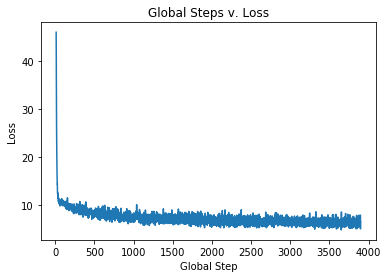

<Figure size 432x288 with 0 Axes>

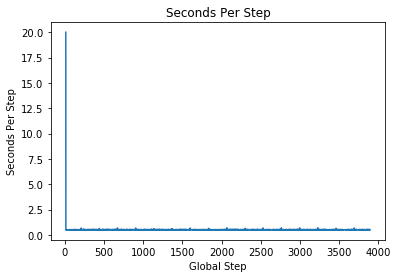

In [2]:
with open("output.txt", 'w') as f:
    f.write(cout.stdout)
    f.close()
%matplotlib inline
%run viewTraining

## Evaluation

In [3]:
!mkdir -p evalOutput

In [1]:
%cd models/research
%run object_detection/legacy/eval.py --eval_dir=../../evalOutput --logtostderr --checkpoint_dir=../../trainingOutput/ --pipeline_config_path=../../FromScratch/models/model/ssd_mobilenet_v1_coco.config
%cd ../..

/home-net/home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Bad key "text.kerning_factor" on line 4 in
/home-1/cpaolic1@jhu.edu/.conda/envs/tensorflow/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution





Instructions for updating:
Use object_detection/model_main.py.


W0329 16:33:35.067533 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/.conda/envs/tensorflow/lib/python3.7/site-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.


W0329 16:33:35.068505 47909484139904 module_wrapper.py:139] From /home-net/home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/eval.py:88: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.



W0329 16:33:35.069737 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



W0329 16:33:35.074162 47909484139904 module_wrapper.py:139] From /home-net/home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/eval.py:92: The name tf.gfile.Copy is deprecated. Please use tf.io.gfile.copy instead.



W0329 16:33:35.080159 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/data_decoders/tf_example_decoder.py:182: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.



W0329 16:33:35.081041 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/data_decoders/tf_example_decoder.py:197: The name tf.VarLenFeature is deprecated. Please use tf.io.VarLenFeature instead.



W0329 16:33:35.102950 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:64: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.



Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.


W0329 16:33:35.107856 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:86: parallel_interleave (from tensorflow.contrib.data.python.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


W0329 16:33:35.108738 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/.conda/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/contrib/data/python/ops/interleave_ops.py:77: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


Instructions for updating:
Use `tf.data.Dataset.map()


W0329 16:33:35.128223 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:155: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W0329 16:33:35.684764 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:43: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


W0329 16:33:35.690909 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:44: The name tf.add_to_collection is deprecated. Please use tf.compat.v1.add_to_collection instead.



W0329 16:33:35.691730 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/builders/dataset_builder.py:44: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



W0329 16:33:35.694505 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/prefetcher.py:51: The name tf.PaddingFIFOQueue is deprecated. Please use tf.queue.PaddingFIFOQueue instead.



Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0329 16:33:35.697328 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/prefetcher.py:57: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0329 16:33:35.699173 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/prefetcher.py:57: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0329 16:33:35.700004 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/prefetcher.py:58: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.



W0329 16:33:35.707152 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/preprocessor.py:2937: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



W0329 16:33:35.719077 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/meta_architectures/ssd_meta_arch.py:597: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Please use `layer.__call__` method instead.


W0329 16:33:35.721048 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/.conda/envs/tensorflow/lib/python3.7/site-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1057: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


W0329 16:33:37.325743 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/anchor_generator.py:171: The name tf.assert_equal is deprecated. Please use tf.compat.v1.assert_equal instead.



W0329 16:33:37.337558 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/predictors/convolutional_box_predictor.py:150: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.



INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.338340 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.370934 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.403150 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.435597 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.468446 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


INFO:tensorflow:depth of additional conv before box predictor: 0


I0329 16:33:37.501031 47909484139904 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0329 16:33:37.649838 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/post_processing.py:581: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W0329 16:33:39.190970 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/box_coders/faster_rcnn_box_coder.py:82: The name tf.log is deprecated. Please use tf.math.log instead.



W0329 16:33:39.264380 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/losses.py:79: The name tf.is_nan is deprecated. Please use tf.math.is_nan instead.



W0329 16:33:39.266478 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/losses.py:177: The name tf.losses.huber_loss is deprecated. Please use tf.compat.v1.losses.huber_loss instead.



W0329 16:33:39.268547 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/core/losses.py:183: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.



Instructions for updating:
Use `tf.cast` instead.


W0329 16:33:39.402805 47909484139904 deprecation.py:323] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:796: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


W0329 16:33:39.620822 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/evaluator.py:263: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



W0329 16:33:39.621772 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/evaluator.py:264: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.



W0329 16:33:39.626308 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/evaluator.py:270: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



INFO:tensorflow:Starting evaluation at 2020-03-29-20:33:39


I0329 16:33:39.788094 47909484139904 eval_util.py:496] Starting evaluation at 2020-03-29-20:33:39


W0329 16:33:39.791309 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:308: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



W0329 16:33:39.792119 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:308: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



W0329 16:33:42.331125 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:309: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



W0329 16:33:43.472855 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:310: The name tf.local_variables_initializer is deprecated. Please use tf.compat.v1.local_variables_initializer instead.



W0329 16:33:43.679192 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:311: The name tf.tables_initializer is deprecated. Please use tf.compat.v1.tables_initializer instead.



INFO:tensorflow:Restoring parameters from ../../trainingOutput/model.ckpt-3460


I0329 16:33:44.046112 47909484139904 saver.py:1284] Restoring parameters from ../../trainingOutput/model.ckpt-3460


W0329 16:33:47.258982 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/evaluator.py:240: The name tf.train.global_step is deprecated. Please use tf.compat.v1.train.global_step instead.



W0329 16:33:47.260112 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/legacy/evaluator.py:240: The name tf.train.get_global_step is deprecated. Please use tf.compat.v1.train.get_global_step instead.



INFO:tensorflow:Creating detection visualizations.


I0329 16:33:47.338298 47909484139904 eval_util.py:168] Creating detection visualizations.


W0329 16:33:47.339551 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:222: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



W0329 16:33:47.352581 47909484139904 module_wrapper.py:139] From /home-1/cpaolic1@jhu.edu/code/AutomaticLP/models/research/object_detection/eval_util.py:229: The name tf.summary.FileWriterCache is deprecated. Please use tf.compat.v1.summary.FileWriterCache instead.



INFO:tensorflow:Detection visualizations written to summary with tag image-0.


I0329 16:33:48.075292 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-0.
W0329 16:33:48.076483 47909484139904 object_detection_evaluation.py:335] image b'8NS8370.png' does not have groundtruth difficult flag specified


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.113502 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-1.


I0329 16:33:48.115400 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-1.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.153010 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-2.


I0329 16:33:48.154711 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-2.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.193343 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-3.


I0329 16:33:48.194971 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-3.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.232661 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-4.


I0329 16:33:48.234474 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-4.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.271803 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-5.


I0329 16:33:48.273664 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-5.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.311044 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-6.


I0329 16:33:48.312676 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-6.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.349326 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-7.


I0329 16:33:48.350948 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-7.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.386529 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-8.


I0329 16:33:48.388164 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-8.


INFO:tensorflow:Creating detection visualizations.


I0329 16:33:48.424136 47909484139904 eval_util.py:168] Creating detection visualizations.


INFO:tensorflow:Detection visualizations written to summary with tag image-9.


I0329 16:33:48.425771 47909484139904 eval_util.py:233] Detection visualizations written to summary with tag image-9.


INFO:tensorflow:Running eval ops batch 100/100


I0329 16:33:51.514601 47909484139904 eval_util.py:332] Running eval ops batch 100/100


INFO:tensorflow:Running eval batches done.


I0329 16:33:51.550965 47909484139904 eval_util.py:366] Running eval batches done.


INFO:tensorflow:# success: 100


I0329 16:33:51.551797 47909484139904 eval_util.py:371] # success: 100


INFO:tensorflow:# skipped: 0


I0329 16:33:51.552586 47909484139904 eval_util.py:372] # skipped: 0
I0329 16:33:51.557145 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.000169
I0329 16:33:51.559176 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.021503
I0329 16:33:51.562143 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.000556
I0329 16:33:51.565601 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.001950
I0329 16:33:51.567626 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.006370
I0329 16:33:51.570488 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.000205
I0329 16:33:51.571969 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.000243
I0329 16:33:51.574567 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.011467
I0329 16:33:51.577278 47909484139904 object_detection_evaluation.py:1311] average_precision: 0.007490
I0329 16:33:51

INFO:tensorflow:Writing metrics to tf summary.


I0329 16:33:51.791943 47909484139904 eval_util.py:80] Writing metrics to tf summary.


INFO:tensorflow:Losses/Loss/classification_loss: 10.323298


I0329 16:33:51.793103 47909484139904 eval_util.py:87] Losses/Loss/classification_loss: 10.323298


INFO:tensorflow:Losses/Loss/localization_loss: 1.651986


I0329 16:33:51.794014 47909484139904 eval_util.py:87] Losses/Loss/localization_loss: 1.651986


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/0: 0.002060


I0329 16:33:51.794875 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/0: 0.002060


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/1: 0.000169


I0329 16:33:51.795722 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/1: 0.000169


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/2: 0.021503


I0329 16:33:51.796547 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/2: 0.021503


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/3: 0.000556


I0329 16:33:51.797372 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/3: 0.000556


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/4: 0.001950


I0329 16:33:51.798216 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/4: 0.001950


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/5: 0.006370


I0329 16:33:51.799046 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/5: 0.006370


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/6: 0.000205


I0329 16:33:51.799975 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/6: 0.000205


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/7: 0.000243


I0329 16:33:51.800826 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/7: 0.000243


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/8: 0.011467


I0329 16:33:51.801657 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/8: 0.011467


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/9: 0.007490


I0329 16:33:51.802479 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/9: 0.007490


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/A: 0.000000


I0329 16:33:51.803310 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/A: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/B: 0.000000


I0329 16:33:51.804111 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/B: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/C: 0.000000


I0329 16:33:51.804927 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/C: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/D: 0.000000


I0329 16:33:51.805747 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/D: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/E: 0.000000


I0329 16:33:51.806556 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/E: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/F: 0.000000


I0329 16:33:51.807363 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/F: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/G: 0.000000


I0329 16:33:51.808171 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/G: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/H: 0.000000


I0329 16:33:51.808995 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/H: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/J: 0.000000


I0329 16:33:51.809814 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/J: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/K: 0.000000


I0329 16:33:51.810645 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/K: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/L: 0.000000


I0329 16:33:51.811451 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/L: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/M: 0.000000


I0329 16:33:51.812267 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/M: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/N: 0.000000


I0329 16:33:51.813082 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/N: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/P: 0.000000


I0329 16:33:51.813888 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/P: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/R: 0.000000


I0329 16:33:51.814707 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/R: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/S: 0.000000


I0329 16:33:51.815529 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/S: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/T: 0.000000


I0329 16:33:51.816324 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/T: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/V: 0.000000


I0329 16:33:51.817125 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/V: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/W: 0.000000


I0329 16:33:51.817960 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/W: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/X: 0.000000


I0329 16:33:51.818761 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/X: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/Y: 0.000000


I0329 16:33:51.819562 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/Y: 0.000000


INFO:tensorflow:PascalBoxes_PerformanceByCategory/AP@0.5IOU/Z: 0.000000


I0329 16:33:51.820391 47909484139904 eval_util.py:87] PascalBoxes_PerformanceByCategory/AP@0.5IOU/Z: 0.000000


INFO:tensorflow:PascalBoxes_Precision/mAP@0.5IOU: 0.001625


I0329 16:33:51.821196 47909484139904 eval_util.py:87] PascalBoxes_Precision/mAP@0.5IOU: 0.001625


INFO:tensorflow:Metrics written to tf summary.


I0329 16:33:51.821969 47909484139904 eval_util.py:88] Metrics written to tf summary.


KeyboardInterrupt: 

/home-net/home-1/cpaolic1@jhu.edu/code/AutomaticLP
